In [1]:
import numpy as np
import matplotlib.pyplot as plt

from kafe2 import XYContainer, XYFit, Plot
from uncertainties import ufloat
from uncertainties import unumpy as unp
from uncertainties.unumpy import nominal_values as n
from uncertainties.unumpy import std_devs as s


---

In [2]:
# defining a function to calculate the diameter
def get_d(val):
    return (val + val[::-1])[0:int(len(val)/2)]

In [3]:
# defining the fitfunction for platedistance
def lin(n, m, b):
    return  -m* n + b

In [4]:
# defning the used constants
f = ufloat(150,10)
lam_las = 635 * 10 **-6

---

In [5]:
# putting in the measurements
las_green = unp.uarray([4565.27967601, 3942.64630401, 3190.44580764, 2161.01480869, 1974.41062895, 3010.05677808, 3778.54401984, 4408.68028892], 
                        [0.37905245, 0.49563763, 0.54116536, 0.56647957, 0.80073233, 0.77558471, 0.60748222, 0.50278631]) * 10 **-3
las_uv = unp.uarray([4517.00985292, 3875.14034087, 3100.20391521, 2016.95224844, 1997.71080539, 3110.96640119, 3906.93578295, 4547.48775808],
                        [0.36062182, 0.36812384, 0.40087704, 0.73637993, 1.45845218, 1.19444373, 1.31402782, 0.65506712]) * 10 **-3

In [6]:
# calculating the diameters
D_las_green = get_d(las_green) 
D_las_uv = get_d(las_uv)

---

## Der Laser

---

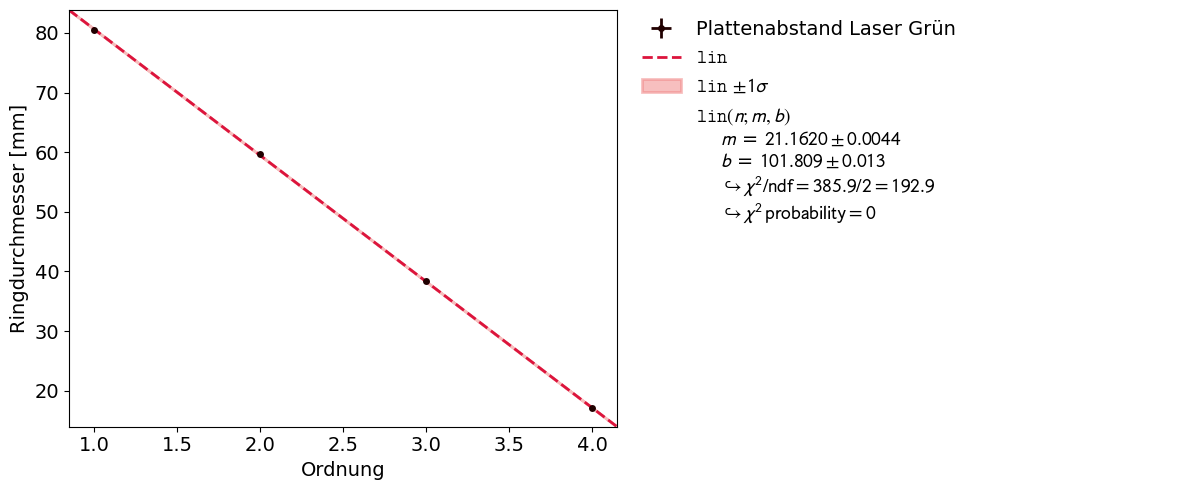

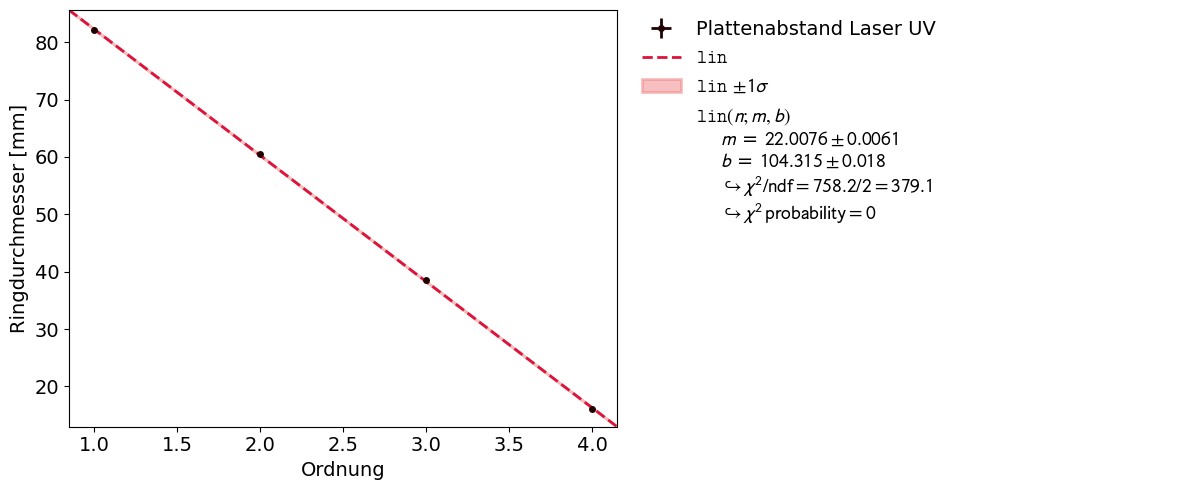

In [7]:
# fitting
od = np.arange(1,5,1)

# fit for laser at green light
cont_las_green = XYContainer(od, n(D_las_green**2))
cont_las_green.label = 'Plattenabstand Laser Grün'
cont_las_green.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

fit_las_green = XYFit(cont_las_green, lin)
fit_las_green.add_error('y', s(D_las_green**2))
fit_las_green.do_fit()

p_las_green = Plot([fit_las_green])
p_las_green.customize('model_line', 'color', 'crimson')
p_las_green.customize('model_error_band', 'color', 'lightcoral')
p_las_green.plot()
# plt.savefig('FitLasGreen.png')
plt.show()

# fit for laser at uv light
cont_las_uv = XYContainer(od, n(D_las_uv**2))
cont_las_uv.label = 'Plattenabstand Laser UV'
cont_las_uv.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

fit_las_uv = XYFit(cont_las_uv, lin)
fit_las_uv.add_error('y', s(D_las_uv**2))
fit_las_uv.do_fit()

p_las_uv = Plot([fit_las_uv])
p_las_uv.customize('model_line', 'color', 'crimson')
p_las_uv.customize('model_error_band', 'color', 'lightcoral')
p_las_uv.plot()
# plt.savefig('FitLasUV.png')
plt.show()

In [8]:
# getting the parameters
m_las_green = ufloat(fit_las_green.parameter_values[0], fit_las_green.parameter_errors[0])
m_las_uv = ufloat(fit_las_uv.parameter_values[0], fit_las_uv.parameter_errors[0])

# calculating the results
d_green = 4 * lam_las * f**2 / m_las_green
d_uv = 4 * lam_las * f**2 / m_las_uv

# printing the result
print(f'{d_green.n:.5} +/- {d_green.s:.4}')
print(f'{d_uv.n:.5} +/- {d_uv.s:.4}')

2.7006 +/- 0.3601
2.5968 +/- 0.3462


---

## Die Wellenlängen in Grün

---

In [9]:
# reading the data for green 
green_1 = unp.uarray([4619.84997675, 4126.67054186, 3548.65178801, 2853.27539052, 1893.7838157, 1778.49273663, 2710.5115688,  3383.95291697, 3928.81217882, 4400.75900209] , 
                        [0.28226391, 0.16927245, 0.27780715, 0.29224925, 0.46242967, 0.53933595, 0.33814181, 0.22975665, 0.29579916, 0.61154293]) * 10 **-3
green_2 = unp.uarray([4497.62911806, 3980.50048014, 3380.70684213, 2630.2204984,  1550.86039575, 1447.83852715, 2508.01641704, 3226.35733728, 3800.16802451, 4282.1811168] , 
                        [0.45521845, 0.55306877, 0.53769152, 0.42131707, 0.59607708, 0.80522899, 0.81537084, 0.50383521, 0.544333, 0.60371138]) * 10 **-3

In [10]:
# calculating the diameters
D_green_1 = get_d(green_1)
D_green_2 = get_d(green_2)

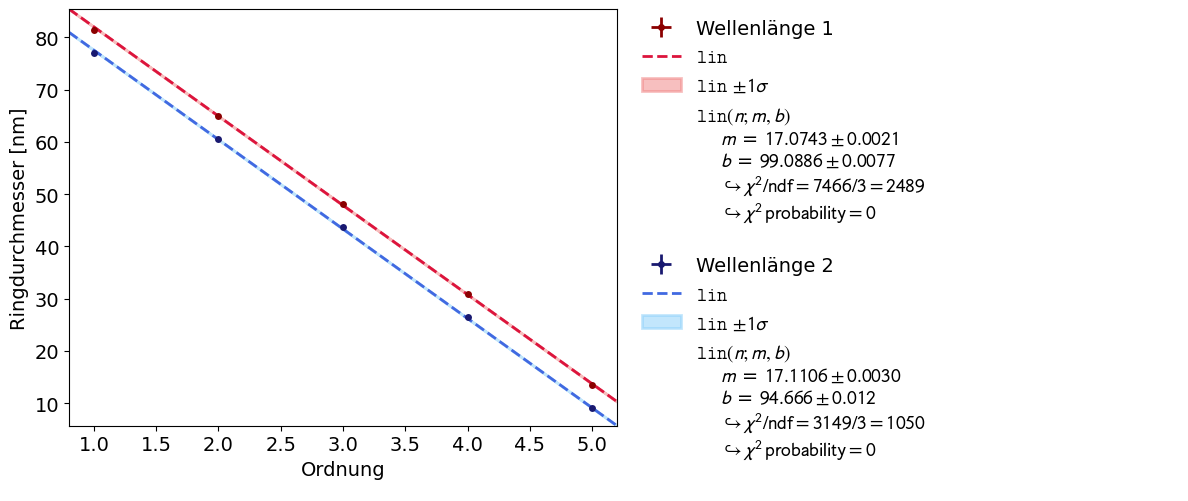

In [11]:
# fitting
od = np.arange(1,6,1)

# fit for laser at green light
cont_green_1 = XYContainer(od, n(D_green_1**2))
cont_green_1.label = 'Wellenlänge 1'
cont_green_1.axis_labels = ('Ordnung','Ringdurchmesser [nm]')

cont_green_2 = XYContainer(od, n(D_green_2**2))
cont_green_2.label = 'Wellenlänge 2'
cont_green_2.axis_labels = ('Ordnung','Ringdurchmesser [nm]')

fit_green_1 = XYFit(cont_green_1, lin)
fit_green_1.add_error('y', s(D_green_1**2))
fit_green_1.do_fit()

fit_green_2 = XYFit(cont_green_2, lin)
fit_green_2.add_error('y', s(D_green_2**2))
fit_green_2.do_fit()

# trying to plot as multifit
plot = Plot([fit_green_1, fit_green_2])
plot.customize('model_line', 'color', ((0, 'crimson'), (1, 'royalblue')))
plot.customize('model_error_band', 'color', ((0, 'lightcoral'), (1, 'lightskyblue')))
plot.customize('data', 'color', ((0, 'darkred'), (1, 'midnightblue')))
plot.plot()
# plt.savefig('FitGreen.png')
plt.show()

In [18]:
# getting the parameters
m_green_1 = ufloat(fit_green_1.parameter_values[0], fit_green_1.parameter_errors[0])
m_green_2 = ufloat(fit_green_2.parameter_values[0], fit_green_2.parameter_errors[0])

# calculating the results
lam_green_1 = d_green * m_green_1 / (4 * f**2)
lam_green_2 = d_green * m_green_2 / (4 * f**2)

# printing the results
print(f'{lam_green_1.n:.5} +/- {lam_green_1.s:.4}')
print(f'{lam_green_2.n:.5} +/- {lam_green_2.s:.4}')

0.00051234 +/- 1.241e-07
0.00051343 +/- 1.388e-07


---

## Die Wellenlängen in UV

---

In [13]:
# reading the data for uv
uv_1 = unp.uarray([4377.2783482, 3946.87361757, 3569.51106761, 3135.11110823, 2632.25665854, 1980.85711438, 1988.47444627, 2600.73687304, 3107.10514718, 3516.87106126, 3885.52331223, 4212.60995614] , 
                    [1.12767063, 2.06075039, 1.37470114, 1.71183603, 1.45862028, 1.90629559, 1.47297135, 1.02612266, 5.61112219, 1.2460225, 0.96812833, 1.11784983]) * 10 **-3
uv_2 = unp.uarray([4210.72930027, 3865.71524162, 3473.57005809, 3015.74958857, 2483.81158538, 1812.8516378,  1789.43568846, 2458.17426319, 2975.20812064, 3413.21367966, 3790.62479511, 4124.09973644] , 
                    [108.87017362, 0.43907965, 1.06488623, 0.99243965, 1.45775747, 1.34879351, 1.02440253, 1.07803132, 0.76825845, 0.51769577, 0.85721926, 2.09331766]) * 10 **-3
uv_3 = unp.uarray([4042.20662296, 3683.05558457, 3263.15778268, 2785.24405296, 2185.98661073, 1347.11798702, 1348.79314477, 2175.14361547, 2744.57542128, 3218.52994755, 3617.53375081, 3974.12145771] , 
                    [12.61937317,  0.51985858,  0.6206287,   0.70670419,  1.10153812,  1.02642365, 1.05337563,  1.40985468,  0.78542231,  0.78230723,  0.55040531,  0.80983474]) * 10 **-3

In [14]:
# calculating the diameters
D_uv_1 = get_d(uv_1)
D_uv_2 = get_d(uv_2)
D_uv_3 = get_d(uv_3)

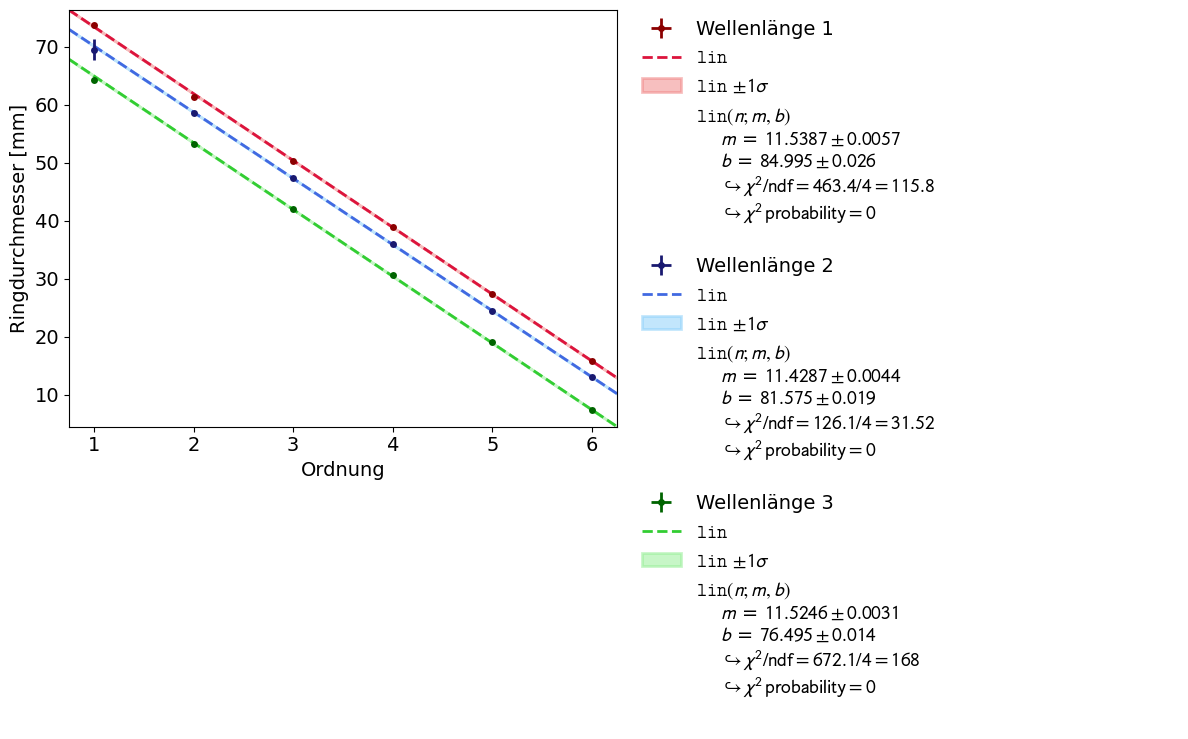

In [20]:
# fitting
od = np.arange(1,7,1)

# fit for laser at uvlight
cont_uv_1 = XYContainer(od, n(D_uv_1**2))
cont_uv_1.label = 'Wellenlänge 1'
cont_uv_1.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

cont_uv_2 = XYContainer(od, n(D_uv_2**2))
cont_uv_2.label = 'Wellenlänge 2'
cont_uv_2.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

cont_uv_3 = XYContainer(od, n(D_uv_3**2))
cont_uv_3.label = 'Wellenlänge 3'
cont_uv_3.axis_labels = ('Ordnung','Ringdurchmesser [mm]')

fit_uv_1 = XYFit(cont_uv_1, lin)
fit_uv_1.add_error('y', s(D_uv_1**2))
fit_uv_1.do_fit()

fit_uv_2 = XYFit(cont_uv_2, lin)
fit_uv_2.add_error('y', s(D_uv_2**2))
fit_uv_2.do_fit()

fit_uv_3 = XYFit(cont_uv_3, lin)
fit_uv_3.add_error('y', s(D_uv_3**2))
fit_uv_3.do_fit()

# trying to plot as multifit
plot = Plot([fit_uv_1, fit_uv_2, fit_uv_3])
plot.customize('model_line', 'color', ((0, 'crimson'), (1, 'royalblue'), (2, 'limegreen')))
plot.customize('model_error_band', 'color', ((0, 'lightcoral'), (1, 'lightskyblue'), (2, 'lightgreen')))
plot.customize('data', 'color', ((0, 'darkred'), (1, 'midnightblue'), (2, 'darkgreen')))
plot.plot()
# plt.savefig('FitUV.png')
plt.show()

In [16]:
# getting and printing the values
m_uv_1 = ufloat(fit_uv_1.parameter_values[0], fit_uv_1.parameter_errors[0])
m_uv_2 = ufloat(fit_uv_2.parameter_values[0], fit_uv_2.parameter_errors[0])
m_uv_3 = ufloat(fit_uv_3.parameter_values[0], fit_uv_3.parameter_errors[0])

# calculating the result
lam_uv_1 = d_uv * m_uv_1 / (4 * f**2)
lam_uv_2 = d_uv * m_uv_2 / (4 * f**2)
lam_uv_3 = d_uv * m_uv_3 / (4 * f**2)

# printing the result
print(f'{lam_uv_1.n} +/- {lam_uv_1.s}')
print(f'{lam_uv_2.n} +/- {lam_uv_2.s}')
print(f'{lam_uv_3.n} +/- {lam_uv_3.s}')

0.00033293362427922683 +/- 1.897715890930694e-07
0.0003297603420781173 +/- 1.5663587723806568e-07
0.0003325282801193432 +/- 1.2912191239121223e-07


---

## Berechnung der Hyperfeinaufspaltung

---

In [17]:
# grünes Licht
lam_m_green = (lam_green_2 - lam_green_1) / 2
lam_del_green = lam_green_2 - lam_green_1
dk_green = lam_del_green / lam_m_green**2
print(f'{dk_green.n} +/- {dk_green.s}')

# uv Licht
lam_mid_uv = lam_uv_3
lam_min_uv = lam_uv_2

lam_m_uv = (lam_mid_uv - lam_min_uv) / 2
lam_del_uv = lam_mid_uv - lam_min_uv
dk_uv = lam_del_uv / lam_m_uv**2
print(f'{dk_uv.n} +/- {dk_uv.s}')

3678603.4805269605 +/- 371032.0688975941
1445119.052675195 +/- 81370.00490790892
